# Practical coursework: COMP6481/8481 2022/23

**Anna Jordanous**

# Part A

This notebook contains the questions for Part A of the practical coursework. 

When you answer these questions, include in your submission for Part A your answers and the code that you used. 

The most straightforward way to do this is to complete Part A within this Jupyter notebook. *Please add your answers and code per question in the indicated cells.*

You can instead submit a separate python file for Part A if this is preferable for you, but remember to include:
* your code 
* comments that: 
 * clearly indicate which question each code snippet relates to, 
 * contain the answer to that question.

Part A is worth 20 marks in total. Each question is annotated with the number of marks that question is worth. In each question, half the marks are awarded for the code and half the marks are awarded for correct answers to the question.

***Cells are provided for you to complete your answers in this notebook. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***

## Important: do this first
Run the following cells before attempting the questions.
When each cell has completed running successfully, it will print an output message confirming that this cell has finished processing. 

If you have any issues, log into jupyter.kent.ac.uk and run this notebook on jupyter.kent.ac.uk.

To run this notebook initially, you will need to be working with connection to the internet, as it reads files from online sources. 

In [14]:
#import required/useful libraries
import nltk
import pandas as pd
import matplotlib
import numpy as np
import urllib.request

print('finished processing import statements')

# Note: these packages are all available if you run this notebook on jupyter.kent.ac.uk

finished processing import statements


In [15]:
#Read in data
prefix = "https://raw.githubusercontent.com/annajordanous/COMP6481-8481/main/"
suffix = ".pdf.txt"
samples = ["instb", "unitb", "instw", "unitw"]
b_env = ["TheUniversityofBirmingham", "TheUniversityofSheffield", "UniversityofNottingham,The", 
         "TheUniversityofLancaster", "UniversityofBristol", "UniversityofSouthampton", 
         "TheUniversityofManchester", "UniversityofDundee", "UniversityofYork"]
w_env = ["AstonUniversity", "BirkbeckCollege", "LiverpoolJohnMooresUniversity",
         "ManchesterMetropolitanUniversity", "NottinghamTrentUniversity", "TheUniversityofHuddersfield",
         "TheUniversityofWestLondon", "UniversityofEastLondon", "UniversityofStirling"]
k_env = ["TheUniversityofKent"]
instb = {}
instw = {}
instk = {}
unitb = {}
unitw = {}
unitk = {}

def readURL(filename):
    # open a connection to a URL using urllib
    webUrl  = urllib.request.urlopen(filename)
    # read the data from the URL and print it
    data = webUrl.read()
    return data
    
def readFiles(x, tag):
    itag = "inst"+tag
    filenameI = prefix+itag+"/"+itag+x+suffix
    utag = "unit"+tag
    filenameU = prefix+utag+"/"+utag+x+"-11"+suffix
    dataI = str(readURL(filenameI))
    dataU = str(readURL(filenameU))
    return(dataI, dataU)

print("finished setting up variables and functions for data readin")


finished setting up variables and functions for data readin


In [16]:
# this cell may take some time to run

# read in textual data 
for x in b_env:
    (instb[x], unitb[x]) = readFiles(x, "b")
    
for x in w_env:
    (instw[x], unitw[x]) = readFiles(x, "w")

for x in k_env:
    (instk[x], unitk[x]) = readFiles(x, "k")
    
print("Finished reading in textual data")

Finished reading in textual data


In [17]:
# this cell may take some time to run

# read in spreadsheet data 
docAwards = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-DoctoralDegreesAwarded.xlsx?raw=true')
researchIncome = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncome.xlsx?raw=true')
researchIncomeInKind = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncomeInKind.xlsx?raw=true')
resultsSummary = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-resultsSummary.xlsx?raw=true')
# This file is just for information
# https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-selectionCommentary.xlsx

print("Finished reading in spreadsheet data")


Finished reading in spreadsheet data


## Selected universities for comparison

Our `env_better_than_kent` sample of 'Computer Science and Informatics' universities with similar REF outputs performance to Kent but *better* performance in environment is:
* The University of Birmingham
* The University of Sheffield
* University of Nottingham, The
* The University of Lancaster
* University of Bristol
* University of Southampton
* The University of Manchester
* University of Dundee
* University of York

Our `env_worse_than_kent` sample of 'Computer Science and Informatics' universities with similar REF outputs performance to Kent but *worse* performance in environment is:
* Aston University
* Birkbeck College
* Liverpool John Moores University
* Manchester Metropolitan University
* Nottingham Trent University
* The University of Huddersfield
* The University of West London
* University of East London
* University of Stirling

## The data

### data frames

* `resultsSummary` gives a summary of all REF results data for the above selected universities and Kent overall, for outputs, for impact and for environment
* `docAwards` gives a summary of all REF data for the above selected universities and Kent for the number of doctoral degrees awarded per year at each university
* `researchIncome` gives a summary of all REF data for the above selected universities and Kent for the amount of research income (funding) awarded per year at each university
* `researchIncomeInKind`  gives a summary of all REF data for the above selected universities and Kent for the amount of research income in kind (non-financial donations that have monetary value) awarded per year at each university


### text dictionaries and variables 

* `instb` is a dictionary of institution statements for the 'env_better_than_kent' sample, with the keys as provided in the list `b_env`: 
 * ['TheUniversityofBirmingham', 'TheUniversityofSheffield', 'UniversityofNottingham,The', 'TheUniversityofLancaster', 'UniversityofBristol', 'UniversityofSouthampton', 'TheUniversityofManchester', 'UniversityofDundee', 'UniversityofYork']

* `unitb` is a dictionary of unit statements for the 'env_better_than_kent' sample, with the keys as provided in the list `b_env`: 
 * ['TheUniversityofBirmingham', 'TheUniversityofSheffield', 'UniversityofNottingham,The', 'TheUniversityofLancaster', 'UniversityofBristol', 'UniversityofSouthampton', 'TheUniversityofManchester', 'UniversityofDundee', 'UniversityofYork']

* `instw` is a dictionary of institution statements for the 'env_worse_than_kent' sample, with the keys as provided in the list `w_env`: 
 * ['AstonUniversity', 'BirkbeckCollege', 'LiverpoolJohnMooresUniversity', 'ManchesterMetropolitanUniversity', 'NottinghamTrentUniversity', 'TheUniversityofHuddersfield', 'TheUniversityofWestLondon', 'UniversityofEastLondon', 'UniversityofStirling']

* `unitw` is a dictionary of unit statements for the 'env_worse_than_kent' sample, with the keys as provided in the list `w_env`: 
 * ['AstonUniversity', 'BirkbeckCollege', 'LiverpoolJohnMooresUniversity', 'ManchesterMetropolitanUniversity', 'NottinghamTrentUniversity', 'TheUniversityofHuddersfield', 'TheUniversityofWestLondon', 'UniversityofEastLondon', 'UniversityofStirling']

* `instk` is a dictionary of the (single) institution statement for Kent, with the key as provided in the list `k_env`: 
 * ["TheUniversityofKent"]

* `unitk` is a dictionary of the (single) unit statement for Kent, with the key as provided in the list `k_env`: 
 * ["TheUniversityofKent"]

Please refer to the slides for the coursework and the lecture on the coursework from Wednesday 8th March if you would like further explanation of these data and text.

### Links

All data and text are sourced from https://www.ref.ac.uk/

Copies of each of these files are available at https://github.com/annajordanous/COMP6481-8481/

**For Part A, we will focus on the unit environment statements for each university in our sample, i.e. the texts in the dictionaries** 
* `unitb`
* `unitw`
* `unitk`

Some code to help you use the text dictionaries:

The following code goes through each of the universities in the `env_better_than_kent` sample, and prints:
* the key for that university in the above dictionaries
* the first 200 characters of the unit environment statement (i.e. the statement written about the research environment at that Computer Science and Informatics deparatment at that university)
* the first 200 characters of the institution environment statement (i.e. the statement written about the research environment across the whole of that university)



In [18]:
for b in b_env:
    print(b)
    print(unitb[b][0:200])
    print(instb[b][0:200])
    print()

TheUniversityofBirmingham
b"Unit-level environment template (REF5b)\n Institution: University of Birmingham\n Unit of Assessment: UoA11, Computer Science and Informatics\n 1 Unit context and structure, research and impact stra
b'Institutional level environment template (REF5a)\n Institution: University of Birmingham\n 1. Context and mission\n Founded in 1900, The University of Birmingham (UoB) is a civic, research-intensive

TheUniversityofSheffield
b"Unit-level environment template (REF5b)\n Institution: University of Sheffield\n Unit of Assessment: B-11 Computer Science and Informatics\n 1. Unit context and structure, research and impact strate
b"Institutional level environment template (REF5a)\n  Institution: University of Sheffield\n  1. Context and mission\nResearch at the University of Sheffield is distinctive and innovative. We drive in

UniversityofNottingham,The
b"Unit-level environment template (REF5b)\n Institution: University of Nottingham\n Unit of Assessment: 11 \xe2\x80\

# Coursework questions for Part A:

For each question, please add your code to the empty code cell below the question, and please add any written answers/comments to the empty markdown cell below the question, as indicated. 

***You are allowed to add additional code markdown cells as needed below this point. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***


## Q1. [4 marks] 

We have defined a measure of `lexical richness` as: the number of unique tokens in a text, divided by the total number of tokens in that text. 

We have also defined a second measure: how many times, on average, is each token used in the text? 

*Without doing any additional processing on the texts*, calculate for each university in our data, including Kent,
i.e. for all texts in the dictionaries unitb, unitw and unitk:
* the lexical richness for the *unit* Environment statements (number of unique tokens in a statement text / the total number of tokens in that statement text)
* how many times, on average, is each token used in the statement text

Store the results in a new dictionary called `lr` , where the dictionary key is the university key (as in b_env, w_env and k_env), and the value is an ordered *list* of: 
* the calculated lexical richness for that university's statement text 
* how many times on average is a word used in that universities statement text?


For example, if we have calculated that the unit Environment statement for "TheUniversityofBirmingham" has a lexical richness of 12.3, and that on average, tokens in this statement are used 5.5 times, one possible way we could add this to the `lr` dictionary is: 

`lr["TheUniversityofBirmingham"] = [12.3, 5.5]`



In [19]:
from nltk.probability import FreqDist
def createLrForUni(text):
    tokens = nltk.word_tokenize(text)
    lexicalRichness = len(set(tokens))/len(tokens)

    freqDist = FreqDist(tokens)
    totalTokens = freqDist.N()
    averageTokenFreq = totalTokens / len(freqDist)

    lr[x] = [lexicalRichness, averageTokenFreq]

lr = {}
for x in b_env:
    createLrForUni(unitb[x])
for x in w_env:
    createLrForUni(unitw[x])
for x in k_env:
    createLrForUni(unitk[x])

In [20]:
# please do not delete or edit this cell 
print(lr)

{'TheUniversityofBirmingham': [0.2641345546430828, 3.785949177877429], 'TheUniversityofSheffield': [0.2712015566726123, 3.6872944693572496], 'UniversityofNottingham,The': [0.2590920087089751, 3.859632741985683], 'TheUniversityofLancaster': [0.25948248151719705, 3.853824713533602], 'UniversityofBristol': [0.2853174909343415, 3.5048674959437536], 'UniversityofSouthampton': [0.2543605788032851, 3.9314268142681428], 'TheUniversityofManchester': [0.287238644556597, 3.481425702811245], 'UniversityofDundee': [0.3265822784810127, 3.062015503875969], 'UniversityofYork': [0.2408542424822831, 4.151888667992048], 'AstonUniversity': [0.267954565781236, 3.7319759679572764], 'BirkbeckCollege': [0.2719693339722089, 3.6768851303735026], 'LiverpoolJohnMooresUniversity': [0.2331708928718923, 4.288699964576692], 'ManchesterMetropolitanUniversity': [0.2627327356910649, 3.806149231346082], 'NottinghamTrentUniversity': [0.2806430729391454, 3.5632449058054596], 'TheUniversityofHuddersfield': [0.26749413604378

## Q2. [4 marks]

Create a Pandas data frame called `lr_df` from the dictionary `lr`. 

Then *transpose* lr_df, so that each row represents a university and the three columns represent the university key names, lexical richness and average token uses, respectively.


In [21]:
import pandas as pd
lr_df = pd.DataFrame(lr)
lr_df = lr_df.transpose()
# make it clear whats what
lr_df.index.names = ["University"]
lr_df.columns = ["Lexical richness", "Average token uses"]

In [22]:
# please do not delete or edit this cell 
lr_df

,Lexical richness,Average token uses
University,,
TheUniversityofBirmingham,0.264135,3.785949
TheUniversityofSheffield,0.271202,3.687294
"UniversityofNottingham,The",0.259092,3.859633
TheUniversityofLancaster,0.259482,3.853825
UniversityofBristol,0.285317,3.504867
UniversityofSouthampton,0.254361,3.931427
TheUniversityofManchester,0.287239,3.481426
UniversityofDundee,0.326582,3.062016
UniversityofYork,0.240854,4.151889


## Q3. [4 marks] 

Choose an appropriate visualisation to create a visualisation of the data in your `lr_df` data frame from Q2. 

You can consult the lectures on visualisation and also use the following docs to help guide you and give you inspiration:
* https://matplotlib.org/stable/plot_types/basic/index.html 
* https://realpython.com/pandas-plot-python/ 
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
* https://www.w3schools.com/python/matplotlib_intro.asp 

Give a brief comment in the markdown box below about why you have chosen the visualisation you did, with reference to the type of data you are visualising. 

Also add a comment answering the question: "Do you see any patterns in your visualisation of the data frame `lr_df`?"

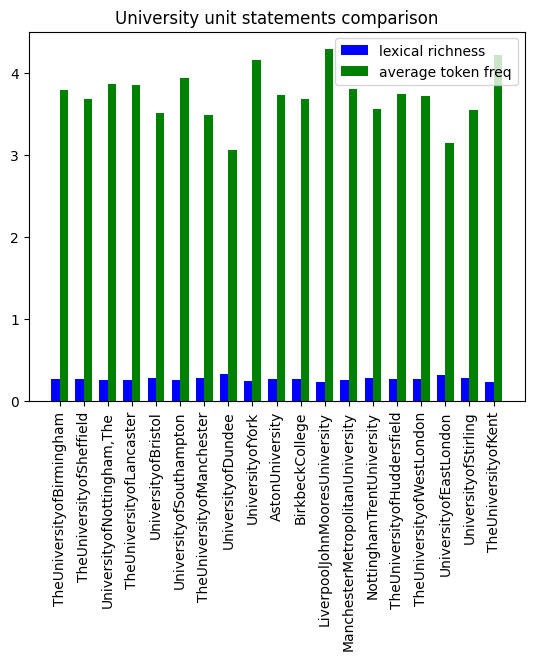

In [23]:
# please add your code for Q3 here (double click to edit)
import matplotlib.pyplot as plt

lr_df.columns=['LR', 'ATF']

# Set the x axis ticks
r = np.arange(len(lr_df.index))
# Set barwidth
barWidth = 0.35

# Create the grouped bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(r, lr_df["LR"], color="b", width=barWidth, label="lexical richness")
rects2 = ax.bar(r + barWidth, lr_df["ATF"], color="g", width=barWidth, label="average token freq")

# Add x-axis ticks and labels
ax.set_xticks(r + barWidth / 2)
ax.set_xticklabels(lr_df.index, rotation=90)

# Add plot title
plt.title("University unit statements comparison")

# Add plot legend
ax.legend()
  
# show the plot
plt.show()

**Please add your written answers/comments for Q3 here (double-click to edit)**

"Why did you chose the visualisation you did, with reference to the type of data you are visualising?"

Your answer:
The data is multivariate since its both categorical and numerical, so i used a bar chart with multiple bars, so i can compare the two numerical variables across every group/category. I considered using a scatter graph but decided there are too many catergories.


"Do you see any patterns in your visualisation of the data frame `lr_df`?"

Your answer:
Universities with a lower lexical richness seem to have a higher average token frequency.

## Q4. [6 marks]

For the *unit* environment statement for each university in our data, including Kent, (i.e. for all texts in the dictionaries unitb, unitw and unitk), perform the following pre-processing steps in this order:

* tokenise the text using nltk.word_tokenize()
* convert all text to lower case
* perform POS-tagging using nltk.pos_tag()

These steps will create a list of `POS-tagged tokens` for each university's unit environment statement. By `POS-tagged tokens`, this means tokens with tags indicating the relevant part of speech (POS). 

Using FreqDist, for each university's unit environment statement, calculate the frequency distribution for these POS-tagged tokens. (So you will calculate one frequency distribution per each university in our data.)

Create a new dictionary called `fd` where the dictionary key is the university key (as in b_env, w_env and k_env), and the value is a list of the 10 most common `POS-tagged tokens` for that university's pre-processed unit environment statement.

For example, if we have calculated a list of the 10 most common `POS-tagged tokens` from the pre-processed unit Environment statement for "TheUniversityofBirmingham", and stored that list in the list variable `mostCommon`, one possible way we could add this to the fd dictionary is:

fd["TheUniversityofBirmingham"] = mostCommon

In [24]:
# please add your code for Q4 here (double-click to edit)
from nltk.probability import FreqDist

def createFdForUni(text):
    tokens = nltk.word_tokenize(text)
    tokens_l = [l.lower() for l in tokens]
    pos_tokens = nltk.pos_tag(tokens_l)
    freqDist = FreqDist(pos_tokens)

    fd[x] = freqDist.most_common(10)

fd = {}
for x in b_env:
    createFdForUni(unitb[x])
for x in w_env:
    createFdForUni(unitw[x])
for x in k_env:
    createFdForUni(unitk[x])

In [25]:
# please do not delete or edit this cell 
for f in fd:
    print(f, fd[f])

TheUniversityofBirmingham [((',', ','), 891), (('and', 'CC'), 476), (('the', 'DT'), 378), (('(', '('), 330), ((')', ')'), 330), (('.', '.'), 286), (('of', 'IN'), 281), (('in', 'IN'), 219), (('to', 'TO'), 186), (('research', 'NN'), 154)]
TheUniversityofSheffield [((',', ','), 637), (('and', 'CC'), 456), (('.', '.'), 440), (('the', 'DT'), 363), (('(', '('), 302), ((')', ')'), 302), (('of', 'IN'), 288), (('in', 'IN'), 253), (('to', 'TO'), 244), (('a', 'DT'), 179)]
UniversityofNottingham,The [((',', ','), 671), (('and', 'CC'), 490), (('the', 'DT'), 465), (('of', 'IN'), 320), ((')', ')'), 280), (('(', '('), 278), (('.', '.'), 275), (('in', 'IN'), 228), (('to', 'TO'), 197), (('research', 'NN'), 187)]
TheUniversityofLancaster [((',', ','), 678), (('and', 'CC'), 465), (('the', 'DT'), 332), (('of', 'IN'), 287), ((')', ')'), 284), (('(', '('), 261), (('.', '.'), 256), (('to', 'TO'), 222), (('in', 'IN'), 188), (('research', 'NN'), 161)]
UniversityofBristol [((',', ','), 783), (('and', 'CC'), 488)

## Q5. [2 marks] 

Looking at the original texts in `unitb`, `unitw` and `unitk`, suggest one extra pre-processing step you could do to improve the quality of this data. Briefly explain what that step is and why it would be useful. 

* You do not have to write the code to perform this step. * 

**Please add your written answers/comments for Q5 here (double-click to edit)**

What additional pre-processing step would you suggest and why?

I think an additional step would be to remove stop words, because these words dont really add much to the context of the texts hence just adding noise to analysis.


# End of part A. 

*Please submit this Jupyter notebook (or your Python file, as described above, if you preferred to work in a python file) as part of your submitted zip file.*



# Please now see the coursework specification document on Moodle for Part B

You are welcome to continue adding code/markdown comments to this file *below* this point, in cells below here, as you experiment with code for Part B. 


### methods to try
- lexical richness and average token frequency -
- concordances, collocation, lexical co-occurrence?
- topic modelling
- sentiment analysis
- visual graphs and maths adjustment of xlsx spreadsheets

### stratergy
- get all github data and load in
- come up with list of anaylsis techniques to try
- preprocess data relative to requirement for each technique
- visualise results
- compare results across single texts and across each texts

## topic modelling
- using simple lda on pre-processed text

In [26]:
# topic modelling 
# preprocess text and put into dict

from nltk.corpus import stopwords
import re
#from nltk.tokenize import RegexpTokenizer
#import string

## preprocess: lower -> tokens -> stems
def preprocess(text, stops):
    text = text.lower()
    sent_text = nltk.sent_tokenize(text)
    # get rid of \\n tokens (newlines) from pdf -> txt conversion
    sent_text = [x.replace('\\n','') for x in sent_text]
    # get rid of pdf unicode escape tokens from pdf -> text converstion
    pdf_escape_pattern = re.compile(r'\\\\x[a-fA-F0-9]{2}')
    sent_text = [pdf_escape_pattern.sub('', x.encode('unicode_escape').decode()) for x in sent_text]

    #pdf_escape_pattern = re.compile(r'\\\\x[a-fA-F0-9]{2}')
    #sent_text = [token for token in sent_text if not pdf_escape_pattern.search(token)]
    tok_text = [nltk.word_tokenize(s) for s in sent_text]
    porter = nltk.stem.PorterStemmer()
    porter = nltk.stem.PorterStemmer()
    new_tok_text = []
    for t in tok_text:
        new_t = []
        for o in t:
            if o not in stops:
                new_t.append(porter.stem(o))
        new_tok_text.append(new_t)
    return new_tok_text

# setup text for topic modelling
def setuptext(text):
    stopwords_set = set(stopwords.words("english"))
    punct = set([",", ".", "(", ")", "[", "]", ":", "\\n", "''", ";"])
    freq_words = set(["e.g", "includ", "see", "also", "research", "school", "staff", "ref2021" "li", "student", "support", "impact"])
    stopwords_set = stopwords_set.union(punct)
    stopwords_set = stopwords_set.union(freq_words)
    new_tok_en_u = preprocess(text, stopwords_set)
    return new_tok_en_u

# create a text for every uni, so we will have a model with each
def createTextForEach():
    for x in b_env:
        texts_tm[x] = setuptext(unitb[x])
    for x in w_env:
        texts_tm[x] = setuptext(unitw[x])
    for x in k_env:
        texts_tm[x] = setuptext(unitk[x])

# create 3 texts, for better, kent, and worse, so we will have three models
def createThreeTexts():
    better_text = ""
    for x in b_env:
        better_text+=unitb[x]
    texts_tm["BetterUniversities"] = setuptext(better_text)
    worse_text = ""
    for x in w_env:
        worse_text+=unitw[x]
    texts_tm["WorseUniversities"] = setuptext(worse_text)
    for x in k_env:
        texts_tm["TheUniversityofKent"] = setuptext(unitk[x])
        
# create one text, so we will have one model
def createAText():
    all_texts = []
    for x in b_env:
        all_texts+=unitb[x]
    for x in w_env:
        all_texts+=unitb[x]
    for x in k_env:
        all_texts+=unitb[x]
    texts_tm["AllUniversities"] = setuptext(all_texts)

texts_tm = {}
#createTextForEach()
createThreeTexts()
print(texts_tm.keys())
#createAText()

dict_keys(['BetterUniversities', 'WorseUniversities', 'TheUniversityofKent'])


In [27]:
# identify topics in data with LDA
from gensim import models
from gensim.corpora.dictionary import Dictionary

texts_dict_corp = {}
# setup dicts/corpus for all texts
for text in texts_tm:
    texts_dict_corp[text] = {}
    texts_dict_corp[text]["dict"] = u_dictionary = Dictionary(texts_tm[text])
    texts_dict_corp[text]["corpus"] = [u_dictionary.doc2bow(tx) for tx in texts_tm[text]]


In [28]:
import warnings
# for nmp errs
warnings.filterwarnings("ignore", category=DeprecationWarning) 

text_models = {
    "lda": {},
    "nmf": {},
    "lsi": {},
}

def ldaM(uni):
    u_dict = texts_dict_corp[uni]["dict"] 
    u_corpus = texts_dict_corp[uni]["corpus"]

    # few topics since we have lots of models
    lda = models.ldamodel.LdaModel(u_corpus, num_topics=3, id2word=u_dict, passes=40)
    text_models["lda"][uni] = lda
    topics = lda.show_topics(formatted=False)
    # Train the model on the corpus, with 10 passes, to look for 5 topics
    print(uni)
    for t in topics:
        #print(t)
        print(t[0], [x[0] for x in t[1]])
    print()
    
def nmfM(uni):
    u_dict = texts_dict_corp[uni]["dict"] 
    u_corpus = texts_dict_corp[uni]["corpus"]

    nmf = models.nmf.Nmf(u_corpus, num_topics=3, id2word=u_dict, passes=40)
    text_models["nmf"][uni] = nmf
    topics = nmf.show_topics(formatted=False, num_topics=3)
    print(uni)
    for t in topics:
        print(t[0], [x[0] for x in t[1]])
    print()
        
def lsiM(uni):
    u_dict = texts_dict_corp[uni]["dict"] 
    u_corpus = texts_dict_corp[uni]["corpus"]

    lsi = models.LsiModel(u_corpus, num_topics=3, id2word=u_dict) #lsi does not require passes parameter
    text_models["lsi"][uni] = lsi
    topics = lsi.show_topics(formatted=False, num_topics=3)
    print(uni)
    for t in topics:
        print(t[0], [x[0] for x in t[1]])
    print()

# create model for all the texts (so relative to texts we set up earlier)
def createAllLda():
    # could me individual uni's, or could be groups of uni's
    for uni in texts_tm.keys():
        ldaM(uni)

# create specific lda for however many unis
def create3Lda():
    # better
    ldaM("TheUniversityofBirmingham")
    # worse
    ldaM("AstonUniversity")
    # kent
    ldaM("TheUniversityofKent")
    
createAllLda()

BetterUniversities
0 ['fund', 'develop', 'includ', 'collabor', 'industri', 'provid', 'student', 'univers', 'support', 'project']
1 ['%', 'univers', 'includ', 'member', 'award', 'committe', 'period', 'academ', 'student', 'ref']
2 ['comput', 'system', 'secur', 'scienc', 'technolog', 'includ', 'data', 'epsrc', 'collabor', 'theme']

WorseUniversities
0 ['comput', 'intern', 'ieee', 'confer', 'data', 'intellig', 'system', 'scienc', 'univers', 'includ']
1 ['%', 'period', 'collabor', 'group', 'includ', 'ref', 'environ', 'incom', 'academ', 'student']
2 ['develop', 'fund', 'univers', 'collabor', 'student', 'provid', 'project', 'includ', 'train', 'work']

TheUniversityofKent
0 ['fund', 'includ', 'secur', 'period', 'group', 'li', 'comput', 'ref2021', 'scienc', 'cyber']
1 ['award', 'group', 'includ', 'work', 'develop', 'promot', 'achiev', 'research', 'year', 'director']
2 ['provid', 'section', 'student', 'leav', 'univers', 'period', 'intern', 'ref2021', 'work', 'studi']



In [29]:
import pyLDAvis
import pyLDAvis.gensim

def genVis(modelType, uni):
    model = text_models[modelType][uni]
    u_dict = texts_dict_corp[uni]["dict"]
    u_corpus = texts_dict_corp[uni]["corpus"]
    pyLDAvis.enable_notebook()
    p = pyLDAvis.gensim.prepare(model, u_corpus, u_dict)
    return p

genVis("lda", "BetterUniversities")
genVis("lda", "WorseUniversities")
genVis("lda", "TheUniversityofKent")

/home/emera/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/emera/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/emera/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.112914  0.012225       1        1  43.886156
1      0.042846 -0.082172       2        1  31.305507
2      0.070068  0.069948       3        1  24.808337, topic_info=          Term       Freq      Total Category  logprob  loglift
186     provid  24.000000  24.000000  Default  30.0000  30.0000
697       leav  13.000000  13.000000  Default  29.0000  29.0000
451       fund  38.000000  38.000000  Default  28.0000  28.0000
61     section  27.000000  27.000000  Default  27.0000  27.0000
782  ramaswami  15.000000  15.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
315       year   6.528815  28.747213   Topic3  -5.4388  -0.0883
220      activ   6.065222  20.869104   Topic3  -5.5124   0.1583
321      addit   5.525075  14.449879   Topic3  -5.6057   0.4326
74      includ   6.886350  50.522272   Topic3  -5.3854  -0.5989
5       comput   5.517694  27.739972   Topic3  -5.6070  -0.2209

[225 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
416       1  0.381938      %
416       2  0.381938      %
416       3  0.238711      %
256       2  0.979577    10+
289       3  0.813796    3.1
...     ...       ...    ...
163       3  0.290704   work
694       3  0.905509  write
315       1  0.417432   year
315       2  0.347860   year
315       3  0.243502   year

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

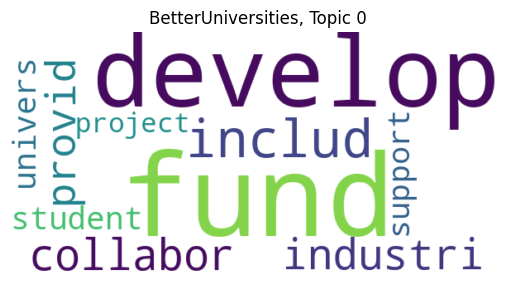

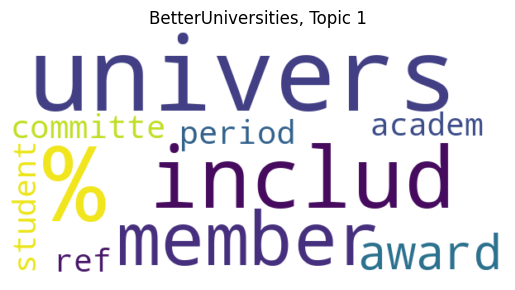

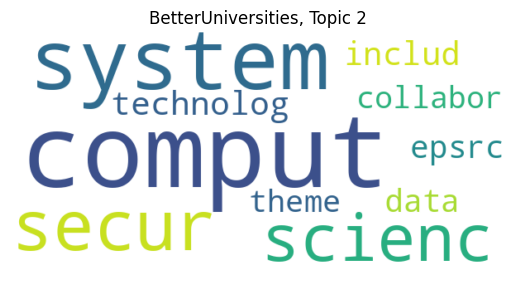

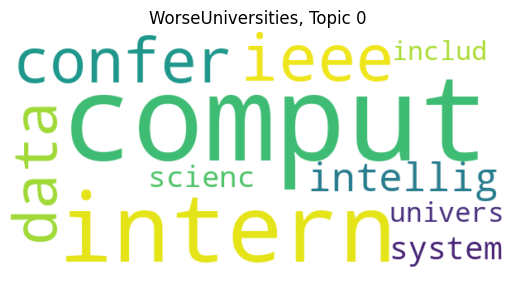

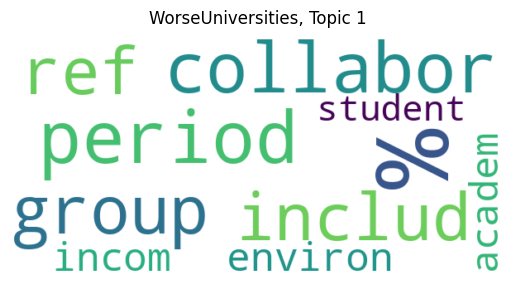

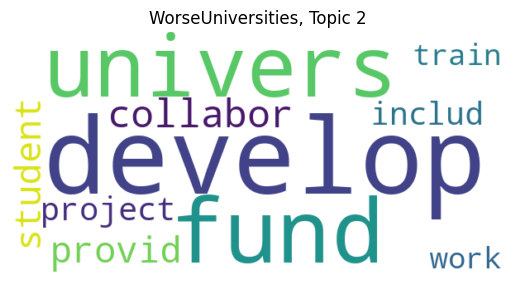

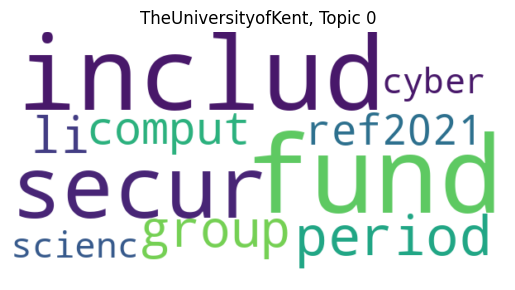

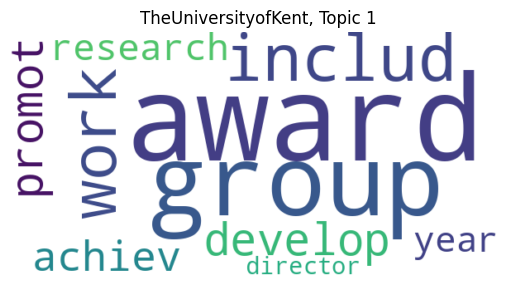

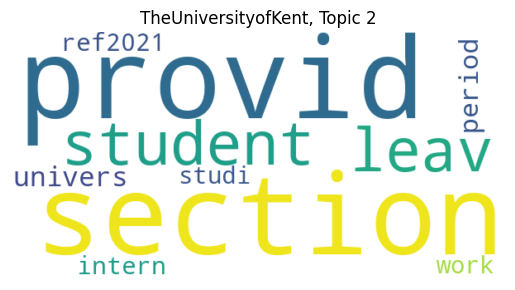

In [30]:
# generate word clouds for the uni's with lda models calculated
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
# for wordcloud package internal workings errs
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Iterate over each uni / LDA model
for i, uni in enumerate(text_models["lda"].keys()):
    # Iterate over each topic in the model
    for j, topic in enumerate(text_models["lda"][uni].show_topics()):
        # Extract the top 10 words in the topic
        words = dict(text_models["lda"][uni].show_topic(j, topn=10))
        # Create a WordCloud object with the top words
        wordcloud = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(words)
        # Create a plot with the word cloud image and title
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"{uni}, Topic {j}")
        plt.show()

## sentiment analysis

#### wordclouds

In [31]:
import re
# create the texts for sentiment analysis
# can swap the text for unit or instituion

def preprocess(text):
    sent_text = nltk.sent_tokenize(text)
    # get rid of \\n tokens (newlines) from pdf -> txt conversion
    sent_text = [x.replace('\\n','') for x in sent_text]
    # get rid of pdf unicode escape tokens from pdf -> text converstion
    pdf_escape_pattern = re.compile(r'\\\\x[a-fA-F0-9]{2}')
    sent_text = [pdf_escape_pattern.sub('', x.encode('unicode_escape').decode()) for x in sent_text]
    return sent_text


def createThreeTextsUnit():
    better_text = ""
    for x in b_env:
        better_text+=unitb[x]
    texts_sa_unit["BetterUniversities"] = preprocess(better_text)
    worse_text = ""
    for x in w_env:
        worse_text+=unitw[x]
    texts_sa_unit["WorseUniversities"] = preprocess(worse_text)
    for x in k_env:
        texts_sa_unit["TheUniversityofKent"] = preprocess(unitk[x])

def createThreeTextsInstituion():
    better_text = ""
    for x in b_env:
        better_text+=instb[x]
    texts_sa_inst["BetterUniversities"] = preprocess(better_text)
    worse_text = ""
    for x in w_env:
        worse_text+=instw[x]
    texts_sa_inst["WorseUniversities"] = preprocess(worse_text)
    for x in k_env:
        texts_sa_inst["TheUniversityofKent"] = preprocess(instk[x])

texts_sa_unit = {}
texts_sa_inst = {}

createThreeTextsUnit()
createThreeTextsInstituion()
print(texts_sa_unit["TheUniversityofKent"])
print(texts_sa_inst["TheUniversityofKent"])

['b"Unit-level environment template (REF5b) Institution: University of Kent Unit of Assessment: 11: Computer Science and Informatics 1.', 'Unit context and structure, research and impact strategy 1.1 Context and Structure UoA11 at Kent is the School of Computing.', 'We conduct research of the highest quality in our four priority areas, for each of which we have established a well-resourced research group.', 'These four groups are:         Programming Languages and Systems (PLAS).', 'Research in PLAS focuses on          foundational aspects of Computer Science by addressing the formalism, implementation,          and verification of programming languages, encompassing functional programming, type          systems, concurrent systems, and automated verification.', 'PLAS members are widely          recognised for the quality of their research, publishing solutions to longstanding problems          and holding programme committee memberships for conferences such as POPL, ICFP,          ICL

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def create_sentiments(text):
    sentiments = [analyzer.polarity_scores(report) for report in text]
    return sentiments
    
def get_avg_sentiment(sentiments):
    sentiments_avg = sum([sum(sentiment.values()) / len(sentiment) for sentiment in sentiments]) / len(sentiments)
    #print(sentiments)
    #print(sum([sentiment["neg"] for sentiment in sentiments]) / len(sentiments))
    #my_uni_avg_sentiment = sum([sum(sentiment.values()) / len(sentiment) for sentiment in my_uni_sentiments]) / len(my_uni_sentiments)
    return sentiments_avg

def createAvgSentiments(texts_sa_dict):
    sentiments_dict = {}
    # Calculate the sentiment scores for each report
    kent_sentiments = create_sentiments(texts_sa_dict["TheUniversityofKent"])
    better_uni_sentiments = create_sentiments(texts_sa_dict["BetterUniversities"])
    worse_uni_sentiments = create_sentiments(texts_sa_dict["WorseUniversities"])

    # Calculate the average sentiment score for each set of reports
    sentiments_dict["kent"] = get_avg_sentiment(kent_sentiments)
    sentiments_dict["better"] = get_avg_sentiment(better_uni_sentiments)
    sentiments_dict["worse"] = get_avg_sentiment(worse_uni_sentiments)

    return sentiments_dict

    # Print out the average sentiment scores
    print("My university's average sentiment score:", my_uni_avg_sentiment)
    print("Average sentiment score for better universities:", better_uni_avg_sentiment)
    print("Average sentiment score for worse universities:", worse_uni_avg_sentiment)

# Load the VADER sentiment analyzer
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

sentiments_avg_unit = createAvgSentiments(texts_sa_unit)
sentiments_avg_inst = createAvgSentiments(texts_sa_inst)

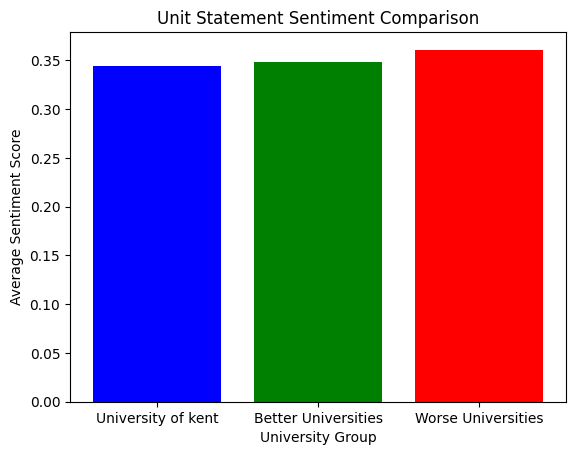

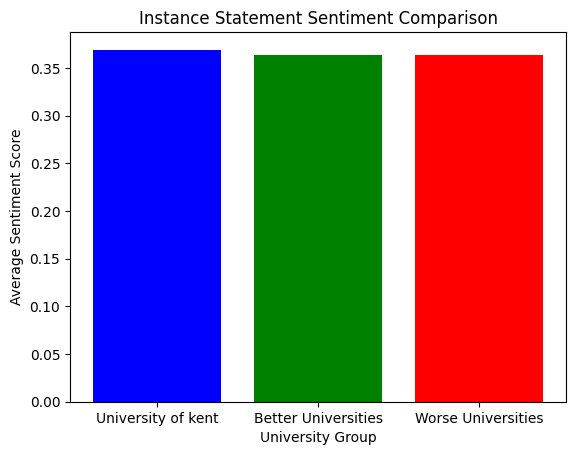

In [33]:
import matplotlib.pyplot as plt

def createGraph(data, statement_type):
    # Define the average sentiment scores for each group
    # Create a bar chart
    plt.bar(["University of kent", "Better Universities", "Worse Universities"], [data["kent"], data["better"], data["worse"]], color=["blue", "green", "red"])

    # Add labels and a title
    plt.xlabel("University Group")
    plt.ylabel("Average Sentiment Score")
    plt.title(f"{statement_type} Statement Sentiment Comparison")

    # Display the chart
    plt.show()
    
createGraph(sentiments_avg_unit, "Unit")
createGraph(sentiments_avg_inst, "Instance")

#### sentiment scores
- dont seem to show us much, since better universities have a lower sentiment score overall than worse universities
- since the range is from -1 to 1, generally shows that the sentiments are quite positive over all.

#### sentiment heatmap

In [34]:
# for later use, create average sentiments for a passed text, but split it up into neg, neu, positive
# since this is used for individual universities return the dict rather than editing existing dicts
def createAvgSentimentsText(text):
    sentiments = create_sentiments(preprocess(text))
    data = {}
    data["neg_avg"] = round(sum([sentiment["neg"] for sentiment in sentiments]) / len(sentiments), 2)
    data["neu_avg"] = round(sum([sentiment["neu"] for sentiment in sentiments]) / len(sentiments), 2)
    data["pos_avg"] = round(sum([sentiment["pos"] for sentiment in sentiments]) / len(sentiments), 2)
    return data

def setup_uni(uni, text, graph_dict):
    data = createAvgSentimentsText(text)
    graph_dict["University"].append(uni)
    graph_dict["Positive"].append(data["pos_avg"])
    graph_dict["Negative"].append(data["neg_avg"])
    graph_dict["Neutral"].append(data["neu_avg"])

def gen_individual_sentiment_scores_unit(graph_dict):
    for x in b_env:
        setup_uni(x, unitb[x], graph_dict)
    for x in w_env:
        setup_uni(x, unitw[x], graph_dict)
    for x in k_env:
        setup_uni(x, unitk[x], graph_dict)

def gen_individual_sentiment_scores_inst(graph_dict):
    for x in b_env:
        setup_uni(x, instb[x], graph_dict)
    for x in w_env:
        setup_uni(x, instw[x], graph_dict)
    for x in k_env:
        setup_uni(x, instk[x], graph_dict)

individual_uni_sentiment_scores_unit = {
    "University": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

individual_uni_sentiment_scores_inst = {
    "University": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

gen_individual_sentiment_scores_unit(individual_uni_sentiment_scores_unit)
gen_individual_sentiment_scores_inst(individual_uni_sentiment_scores_inst)

individual_uni_sentiment_scores_inst

{'University': ['TheUniversityofBirmingham',
  'TheUniversityofSheffield',
  'UniversityofNottingham,The',
  'TheUniversityofLancaster',
  'UniversityofBristol',
  'UniversityofSouthampton',
  'TheUniversityofManchester',
  'UniversityofDundee',
  'UniversityofYork',
  'AstonUniversity',
  'BirkbeckCollege',
  'LiverpoolJohnMooresUniversity',
  'ManchesterMetropolitanUniversity',
  'NottinghamTrentUniversity',
  'TheUniversityofHuddersfield',
  'TheUniversityofWestLondon',
  'UniversityofEastLondon',
  'UniversityofStirling',
  'TheUniversityofKent'],
 'Positive': [0.14,
  0.14,
  0.14,
  0.14,
  0.12,
  0.11,
  0.12,
  0.14,
  0.13,
  0.14,
  0.11,
  0.12,
  0.13,
  0.14,
  0.13,
  0.13,
  0.12,
  0.16,
  0.13],
 'Negative': [0.01,
  0.01,
  0.0,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.0,
  0.02,
  0.01,
  0.01,
  0.0,
  0.01,
  0.0,
  0.01,
  0.01,
  0.01,
  0.01],
 'Neutral': [0.86,
  0.84,
  0.86,
  0.85,
  0.87,
  0.88,
  0.87,
  0.85,
  0.87,
  0.84,
  0.88,
  0.88,
  0.86,
 

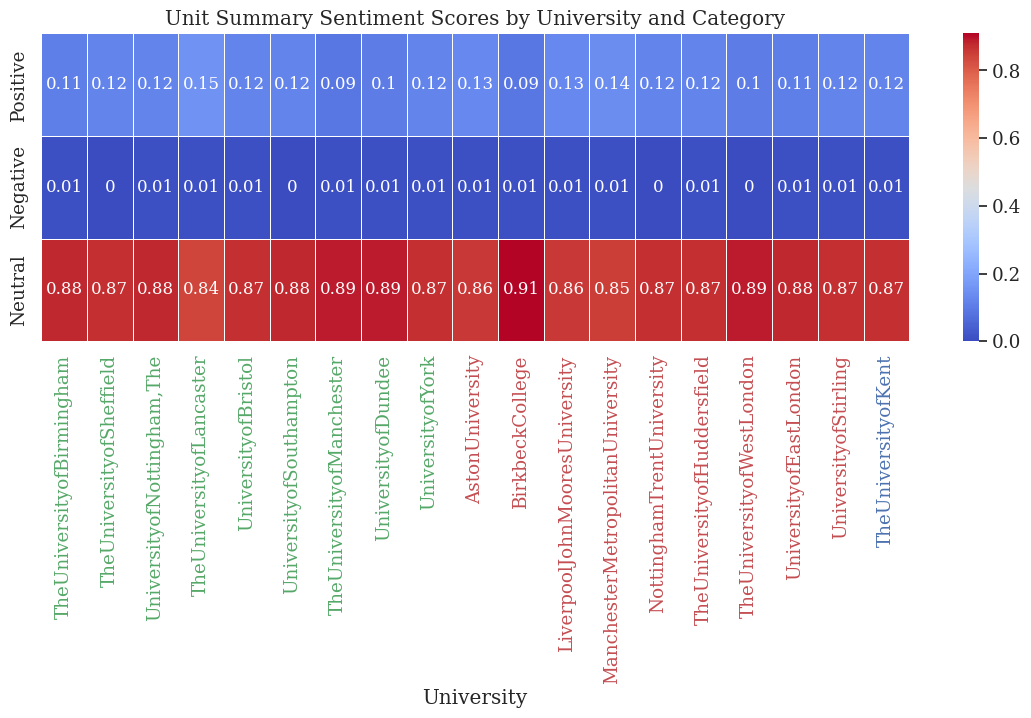

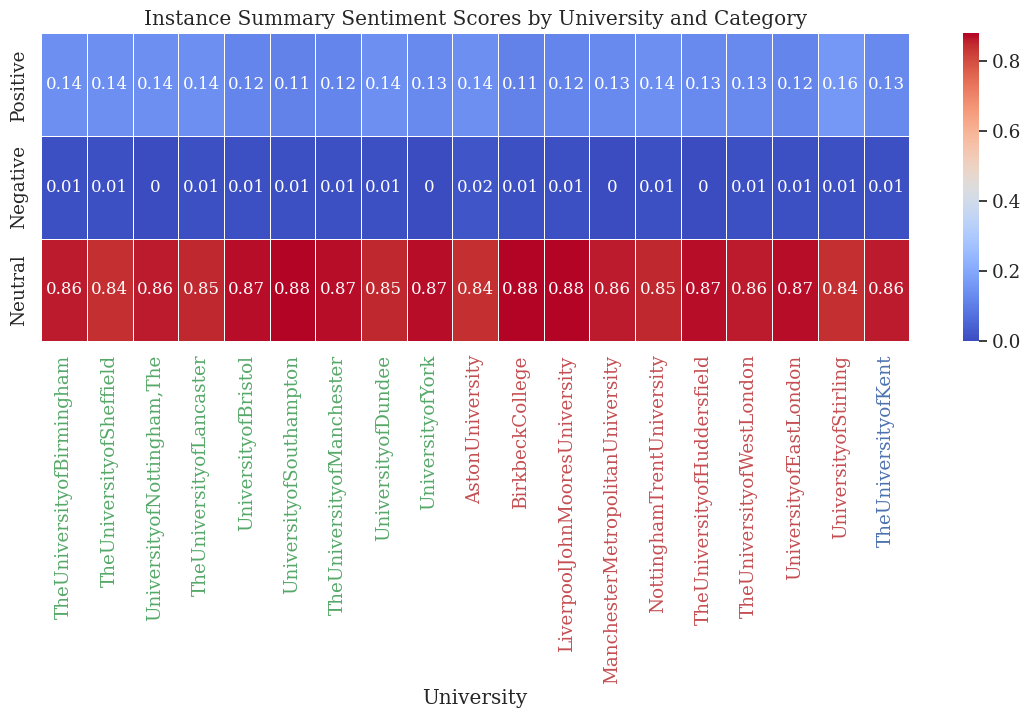

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def createHeatmap(data, summary_type):
    df = pd.DataFrame(data)

    # create a heatmap using seaborn
    sns.set(font_scale=1.2)
    sns.set_style({'font.family': 'serif', 'font.serif': 'Times New Roman'})
    fig, ax = plt.subplots(figsize=(14, 4))
    heatmap = sns.heatmap(df.set_index('University').transpose(), annot=True, cmap='coolwarm', linewidths=.5, ax=ax, annot_kws={"size": 12})

    for i, label in enumerate(ax.get_xticklabels()):
        if b_env.count(label.get_text()) == 1:
            label.set_color("g")
        elif w_env.count(label.get_text()) == 1:
            label.set_color("r")
        elif k_env.count(label.get_text()) == 1:
            label.set_color("b")

    plt.title(f"{summary_type} Summary Sentiment Scores by University and Category")
    plt.show()
    
createHeatmap(individual_uni_sentiment_scores_unit, "Unit")
createHeatmap(individual_uni_sentiment_scores_inst, "Instance")

## measures of text statistics
### Bar charts for Unit and Instition statements
- lexical richness
- average token freq

In [36]:
from nltk.probability import FreqDist
# please add your code for Q1 here (double click to edit)
def createLrForUni(text):
    tokens = nltk.word_tokenize(text)
    lexicalRichness = len(set(tokens))/len(tokens)

    freqDist = FreqDist(tokens)
    totalTokens = freqDist.N()
    averageTokenFreq = totalTokens / len(freqDist)

    return [lexicalRichness, averageTokenFreq]

lr_unit = {}
lr_inst = {}

for x in b_env:
    lr_unit[x] = createLrForUni(unitb[x])
    lr_inst[x] = createLrForUni(instb[x])
for x in w_env:
    lr_unit[x] = createLrForUni(unitw[x])
    lr_inst[x] = createLrForUni(instw[x])
for x in k_env:
    lr_unit[x] = createLrForUni(unitk[x])
    lr_inst[x] = createLrForUni(instk[x])

In [37]:
# please add your code for Q2 here (double click to edit)
import pandas as pd
lr_unit_df = pd.DataFrame(lr_unit).transpose()
lr_inst_df = pd.DataFrame(lr_inst).transpose()

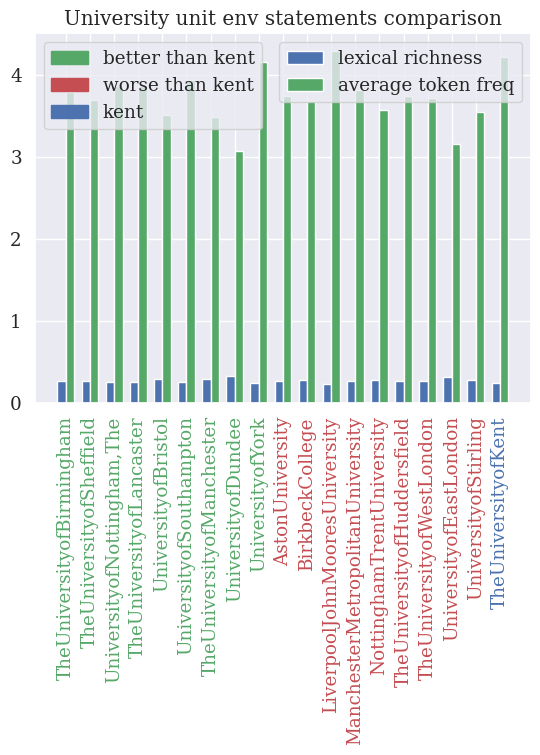

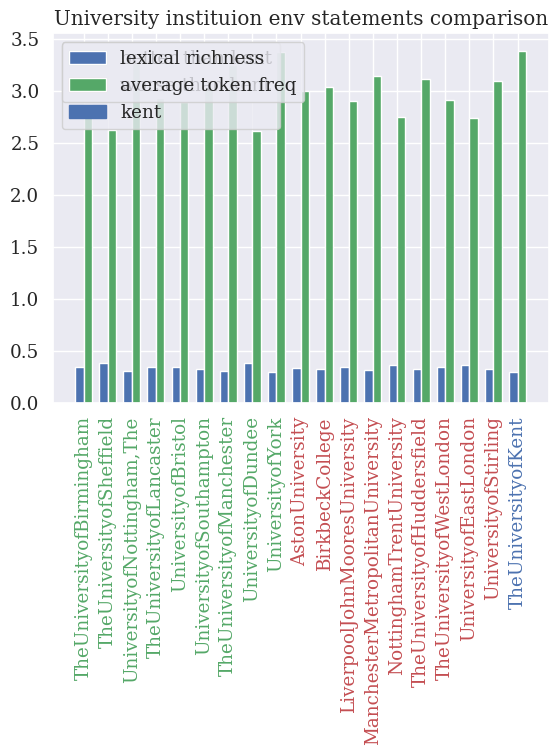

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def createBarChart(frame, summary_type):
    lr_df = frame
    lr_df.columns=['LR', 'ATF']

    # Set the x axis ticks
    r = np.arange(len(lr_df.index))
    # Set barwidth
    barWidth = 0.35

    # Create the grouped bar chart
    fig, ax = plt.subplots()
    rects1 = ax.bar(r, lr_df["LR"], color="b", width=barWidth, label="lexical richness")
    rects2 = ax.bar(r + barWidth, lr_df["ATF"], color="g", width=barWidth, label="average token freq")

    # Add x-axis ticks and labels
    ax.set_xticks(r + barWidth / 2)
    ax.set_xticklabels(lr_df.index, rotation=90)
    xticklabels = ax.set_xticklabels(lr_df.index, rotation=90)

    for i, label in enumerate(xticklabels):
        if b_env.count(label.get_text()) == 1:
            label.set_color('g')
        elif w_env.count(label.get_text()) == 1:
            label.set_color('r')
        elif k_env.count(label.get_text()) == 1:
            label.set_color('b')
            
    # Add legend for label colors
    blue_patch = mpatches.Patch(color='g', label='better than kent')
    green_patch = mpatches.Patch(color='r', label='worse than kent')
    red_patch = mpatches.Patch(color='b', label='kent')
    label_legend = ax.legend(handles=[blue_patch, green_patch, red_patch], loc='upper left')

    # Add the label legend to the plot
    plt.gca().add_artist(label_legend)

    # Add plot title
    plt.title(f"University {summary_type} env statements comparison")

    # Add plot legend
    ax.legend()
      
    # show the plot
    plt.show()

createBarChart(lr_unit_df, "unit")
createBarChart(lr_inst_df, "instituion")

## xlsx mathmatical analysis

#### number of doctorial degrees linegraph

In [39]:
# process docawards

# set headers to correct row
docAwards.columns = docAwards.iloc[3]
# remove the title rows from dataset
docAwards = docAwards.iloc[4:]

# set index to institution name
docAwards = docAwards.set_index("Institution name")

# create a new row with average vals
docAwards["Average Numeber of doctoral degrees"] = docAwards.iloc[:, 8:14].mean(axis=1).round(2)

docAwards.head()

3,Institution UKPRN code,Main panel,Unit of assessment number,Unit of assessment name,Multiple submission letter,Multiple submission name,Sample,Number of doctoral degrees awarded in academic year 2013,Number of doctoral degrees awarded in academic year 2014,Number of doctoral degrees awarded in academic year 2015,Number of doctoral degrees awarded in academic year 2016,Number of doctoral degrees awarded in academic year 2017,Number of doctoral degrees awarded in academic year 2018,Number of doctoral degrees awarded in academic year 2019,Average Numeber of doctoral degrees
Institution name,,,,,,,,,,,,,,,
Aston University,10007759,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,1.67,3.91,4.99,3.67,2.67,4,2.67,3.65
Birkbeck College,10007760,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,4,1,2,4.5,3.5,5,3,3.17
Liverpool John Moores University,10003957,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,6,8,2,4,15,22.5,14,10.92
Manchester Metropolitan University,10004180,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,3,9,4,6,4,5,3,5.17
Nottingham Trent University,10004797,B,11,Computer Science and Informatics,NaN,NaN,ENV WORSE THAN KENT,5,5,5,4,6,5,4,4.83


In [40]:
newDocAwards = docAwards.iloc[:, 8:14].transpose()
#newDocAwards = newDocAwards.set_index("Institution name")
newDocAwards

Institution name,Aston University,Birkbeck College,Liverpool John Moores University,Manchester Metropolitan University,Nottingham Trent University,The University of Birmingham,The University of Huddersfield,The University of Kent,The University of Lancaster,The University of Manchester,The University of Sheffield,The University of West London,University of Bristol,University of Dundee,University of East London,"University of Nottingham, The",University of Southampton,University of Stirling,University of York
3,,,,,,,,,,,,,,,,,,,
Number of doctoral degrees awarded in academic year 2014,3.91,1,8,9,5,19.75,9,6,18,22.92,12.83,5,22.2,4,1,19.77,34.75,7,24
Number of doctoral degrees awarded in academic year 2015,4.99,2,2,4,5,25.3,6,7.5,22,33.45,13.33,6,18.34,4,6.33,29.1,24,4.33,12.5
Number of doctoral degrees awarded in academic year 2016,3.67,4.5,4,6,4,21.1,5,13,11,31.3,23.83,2,23.2,2,5,22.6,37.65,8.5,20.2
Number of doctoral degrees awarded in academic year 2017,2.67,3.5,15,4,6,22,13,8,34,31.23,25.17,3,19.33,5,5,31.62,46.75,4,24
Number of doctoral degrees awarded in academic year 2018,4,5,22.5,5,5,27,5,6,16,31.63,13,2,18.14,2,5,16.3,38.55,1,29
Number of doctoral degrees awarded in academic year 2019,2.67,3,14,3,4,11.7,9,6,22,44.15,17.5,1,14.88,4,9,18.02,36.7,3.5,19


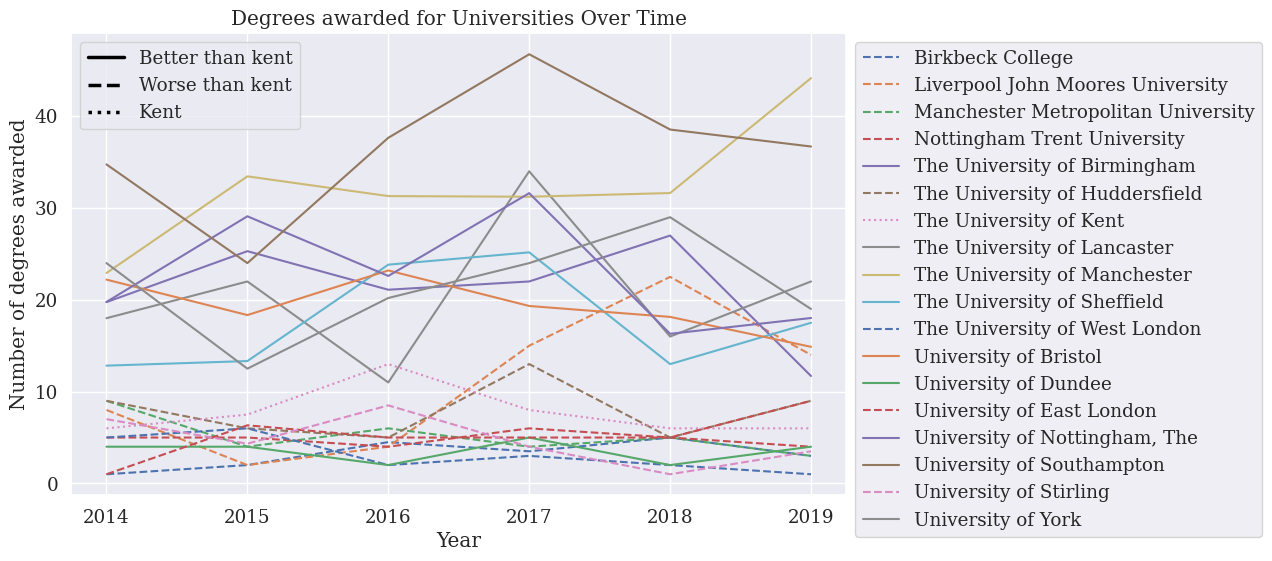

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
#import numpy as np
#from scipy.stats import linregress


# plot docawards on a line chart to show progression over time
# Set x-axis and y-axis values
# x is the column titles for each year, but we only want the year part
x = newDocAwards.index.values
x = [i[52:] for i in x]
# y is each row for every year (all the columns in the new df)
y = newDocAwards.iloc[:, :]
# we need a line for each uni
lines = newDocAwards.columns

# markers for better/worse/kent
markers = ["o", "s", "^"]
marker_styles = ['-', '--', ':']  # for different line styles

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each uni and plot it a line
for i in range(1, len(lines)):
    if b_env.count(lines[i].replace(" ", "")) == 1:
        ax.plot(x, y.iloc[:, i], label=lines[i], linestyle=marker_styles[0])
    elif w_env.count(lines[i].replace(" ", "")) == 1:
        ax.plot(x, y.iloc[:, i], label=lines[i], linestyle=marker_styles[1])
    elif k_env.count(lines[i].replace(" ", "")) == 1:
        ax.plot(x, y.iloc[:, i], label=lines[i], linestyle=marker_styles[2])

# Set title, labels, and legend
ax.set_title('Degrees awarded for Universities Over Time')
#plt.xticks(rotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Number of degrees awarded')
        
# create custom legend with only linestyles
legend_lines = [
    mlines.Line2D([], [], color='black', linewidth=2.5, linestyle=marker_styles[0]),
    mlines.Line2D([], [], color='black', linewidth=2.5, linestyle=marker_styles[1]),
    mlines.Line2D([], [], color='black', linewidth=2.5, linestyle=marker_styles[2])
]
legend_labels = ["Better than kent", "Worse than kent", "Kent"]
legend2 = ax.legend(legend_lines, legend_labels, loc='upper left')
plt.gca().add_artist(legend2)

ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

#### total income bar chart

In [42]:
# process researchIncome
researchIncome = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncome.xlsx?raw=true')

# set headers to correct row
researchIncome.columns = researchIncome.iloc[3]
# remove the title rows from dataset
researchIncome = researchIncome.iloc[4:]

# get rid of rows we dont need
mask = researchIncome["Income source"] == "Total income"
filtered_researchIncome = researchIncome[mask]

# rm columns we dont need
filtered_research_income = filtered_researchIncome.loc[:, ["Institution name", "Sample", "Total income for academic years 2013-14 to 2019-20"]]

# set index to institution name
#researchIncome = researchIncome.set_index("Institution name")
#researchIncome
filtered_research_income

3,Institution name,Sample,Total income for academic years 2013-14 to 2019-20
18,Aston University,ENV WORSE THAN KENT,6186326
33,Birkbeck College,ENV WORSE THAN KENT,1692167
48,Liverpool John Moores University,ENV WORSE THAN KENT,4424332
63,Manchester Metropolitan University,ENV WORSE THAN KENT,3588231
78,Nottingham Trent University,ENV WORSE THAN KENT,3064008
93,The University of Birmingham,ENV BETTER THAN KENT,20885858
108,The University of Huddersfield,ENV WORSE THAN KENT,2002821
123,The University of Kent,KENT,8337523
138,The University of Lancaster,ENV BETTER THAN KENT,28515606
153,The University of Manchester,ENV BETTER THAN KENT,58440853


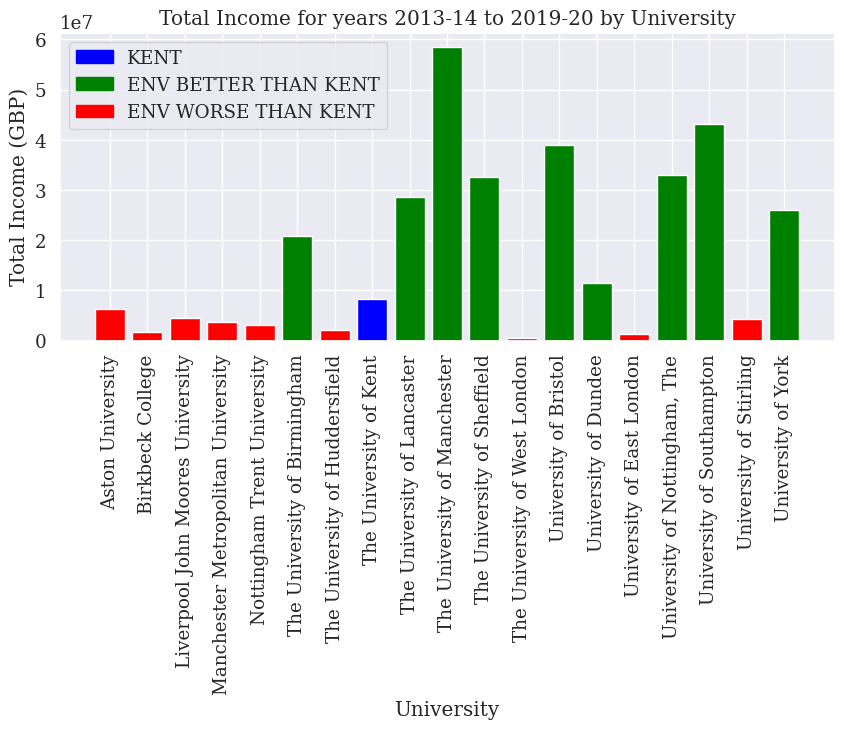

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new dataframe copy
df_plot = filtered_research_income.copy()

# Rename the columns for readability
df_plot.columns = ["University", "Environmental Performance", "Total Income"]

# Create a dictionary to map environmental performance values to colors
color_dict = {
    'KENT': 'blue',
    'ENV BETTER THAN KENT': 'green',
    'ENV WORSE THAN KENT': 'red'
}

# Create a list of colors for each institution based on their environmental performance
colors = [color_dict[x] for x in df_plot["Environmental Performance"]]

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(df_plot["University"], df_plot["Total Income"], color=colors)

# Set the chart title and axis labels
ax.set_title("Total Income for years 2013-14 to 2019-20 by University")
ax.set_xlabel("University")
ax.set_ylabel("Total Income (GBP)")

# Add a legend for the environmental performance categories
legend_handles = [
    plt.Rectangle((0,0),1,1, color=color_dict[x]) for x in color_dict
]
legend_labels = list(color_dict.keys())
ax.legend(legend_handles, legend_labels)

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

#### stacked bar chart

In [44]:
# process a new copy of researchIncome
researchIncome2 = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncome.xlsx?raw=true')

# set headers to correct row
researchIncome2.columns = researchIncome2.iloc[3]
# remove the title rows from dataset
researchIncome2 = researchIncome2.iloc[4:]

# get rid of rows we dont need
#mask = researchIncome["Income source"] == "Total income"
#filtered_researchIncome = researchIncome[mask]

# rm columns we dont need
filtered_research_income2 = researchIncome2.loc[:, ["Institution name", "Sample", "Income source", "Total income for academic years 2013-14 to 2019-20"]]
filtered_research_income2.columns = ["University", "Environmental performance", "Income source", "Total income"]

# set index to institution name
#researchIncome = researchIncome.set_index("Institution name")
#researchIncome
filtered_research_income2

,University,Environmental performance,Income source,Total income
4,Aston University,ENV WORSE THAN KENT,"BEIS Research Councils, The Royal Society, Bri...",273497
5,Aston University,ENV WORSE THAN KENT,UK-based charities (open competitive process),283213
6,Aston University,ENV WORSE THAN KENT,UK-based charities (other),511369
7,Aston University,ENV WORSE THAN KENT,UK central government bodies/local authorities...,1867826
8,Aston University,ENV WORSE THAN KENT,UK central government tax credits for research...,112005
...,...,...,...,...
284,University of York,ENV BETTER THAN KENT,EU (excluding UK) other,360696
285,University of York,ENV BETTER THAN KENT,Non-EU-based charities (open competitive process),0
286,University of York,ENV BETTER THAN KENT,Non-EU industry commerce and public corporations,285457
287,University of York,ENV BETTER THAN KENT,Non-EU other,16243


In [45]:
# proccess and group the filtered research group into groups relative to income sources
grouped_research_income = filtered_research_income2.groupby("University")

#df = filtered_research_income2.copy()

# calculate the total income for each university
pivot_table = pd.pivot_table(filtered_research_income2, index=['University'], columns=['Income source'], values=['Total income'], aggfunc='sum', fill_value=0)

# calculate the percentage contribution of each income source to the total income
total_income = pivot_table['Total income']['Total income']
income_contributions = pivot_table['Total income'].div(total_income, axis=0).mul(100)

income_contributions = income_contributions.drop(('Total income'), axis=1)

# print the percentage contribution of each income source to the total income
print(income_contributions)

Income source                       BEIS Research Councils, The Royal Society, British Academy and The Royal Society of Edinburgh  \
University                                                                                                                          
Aston University                                                             4.420992                                               
Birkbeck College                                                            65.534253                                               
Liverpool John Moores University                                            22.595004                                               
Manchester Metropolitan University                                          21.006451                                               
Nottingham Trent University                                                  2.513179                                               
The University of Birmingham                                         

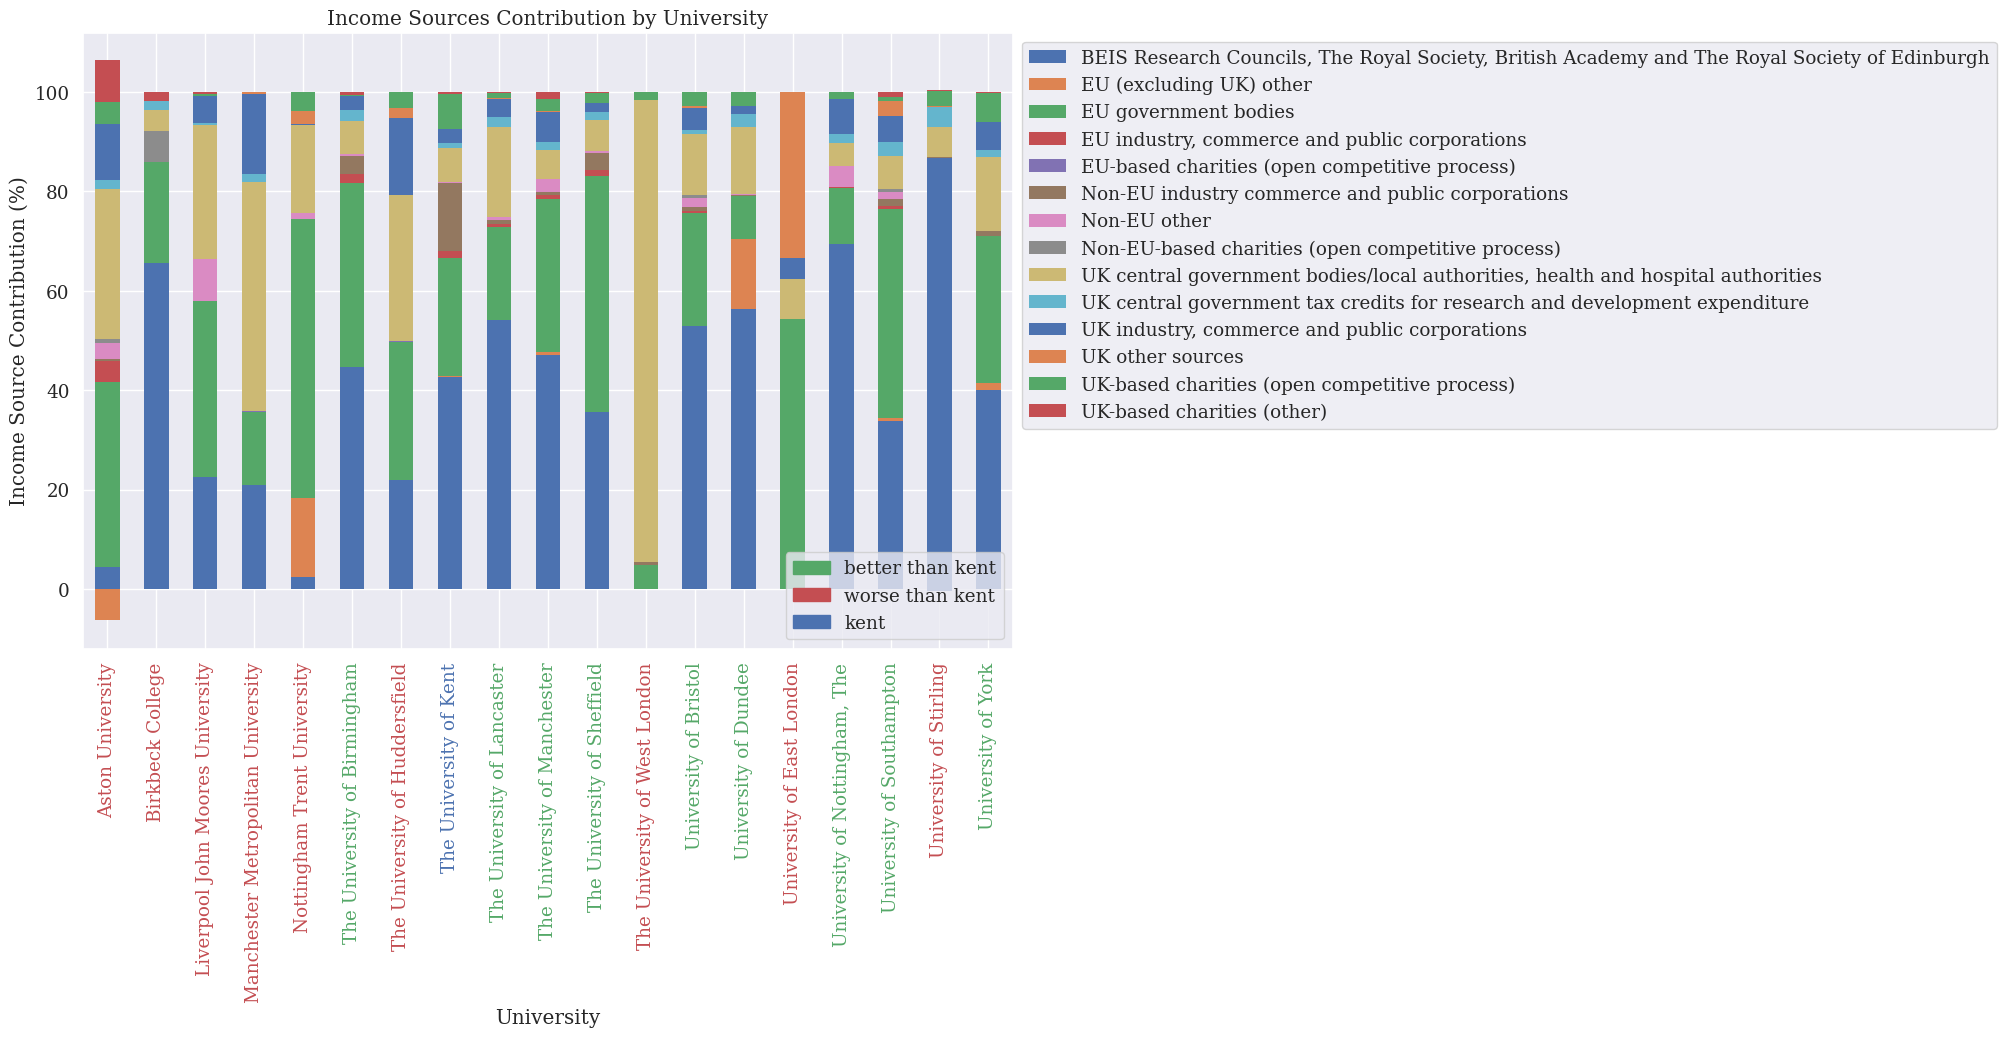

In [46]:
# create a stacked bar chart
ax = income_contributions.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='none')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# add chart title and axis labels
plt.title('Income Sources Contribution by University')
plt.xlabel('University')
plt.ylabel('Income Source Contribution (%)')

# Add x-axis ticks and labels
xticklabels = ax.get_xticklabels()
for i, label in enumerate(xticklabels):
    if b_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('g')
    elif w_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('r')
    elif k_env.count(label.get_text().replace(" ", "")) == 1:
        label.set_color('b')
    label.set_rotation(90)
    
# Add legend for label colors
blue_patch = mpatches.Patch(color='g', label='better than kent')
green_patch = mpatches.Patch(color='r', label='worse than kent')
red_patch = mpatches.Patch(color='b', label='kent')
label_legend = ax.legend(handles=[blue_patch, green_patch, red_patch], loc='lower right')
# Add the label legend to the plot
plt.gca().add_artist(label_legend)

ax.legend(bbox_to_anchor=(1.0, 1.0))
# show the chart
plt.show()